<a href="https://colab.research.google.com/github/duonggiang64/Visual-Exploratory-Titanic-Case-/blob/main/Visual_Exploratory_Duong_Bich_Giang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

**Read the data**

In [ ]:
data = pd.read_csv("https://github.com/ipython-books/cookbook-2nd-data/blob/master/titanic_train.csv?raw=true",
                       index_col='PassengerId')

**Data are presented in the table form. Let's look at the first 5 lines:**

In [ ]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**For example, we will select passengers who boarded in Cherbourg (Embarked=C) and paid more than 200 USD. per ticket (fare > 200).**

Make sure you understand how this design works. <br>
If not, see how the expression in square brackets is calculated.

In [ ]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**You can sort these people in descending order of ticket price.**

In [ ]:
data[(data['Embarked'] == 'C') &
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Example of creating a feature.**

In [ ]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [ ]:
age_categories = [age_category(age) for age in data.Age]

In [ ]:
data['Age_category'] = age_categories

In [ ]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


**Another way is using `apply`.**

In [ ]:
data['Age_category'] = data['Age'].apply(age_category)

**1. How many men/women were on board?**


In [ ]:
data["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

**2. Output the distribution of the `Pclass` variable (socio-economic status) and the same distribution, only for men / women separately. How many 2nd class men were there?**


In [ ]:
gender = pd.crosstab(data['Sex'],data['Pclass'])
print (gender)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


**3. What are the median and standard deviation of payments (`Fare`)? Round to 2 decimal places.**


In [ ]:
# Median of payment is 14.45
import statistics
round(statistics.median(data['Fare']),2)

14.45

In [ ]:
# Standard deviatation of payments is 49.69
round(statistics.stdev(data['Fare']),2)

49.69

**4. Is it true that people under 30 survived more often than people over 60? What are the survival rates in both groups?**


In [ ]:
# True
df_30 = data[data['Age']<30]
df_60 = data[data['Age']>60]
under_30_servived_percent = len(df_30[df_30['Survived']==1])/len(df_30)
over_60_servived_percent = len(df_60[df_60['Survived']==1])/len(df_60)
print("Percent survival of under 30 people", under_30_servived_percent)
print("Percent survival of over 60 people", over_60_servived_percent)


Percent survival of under 30 people 0.40625
Percent survival of over 60 people 0.22727272727272727


**5. Is it true that women survived more than men? What are the survival rates in both groups?**


In [ ]:
df_female = data[data['Sex']=='female']
df_male = data[data['Sex']=='male']
female_servived_percent = len(df_female[df_female['Survived']==1])/len(df_female)
male_servived_percent = len(df_male[df_male['Survived']==1])/len(df_male)
print("It's true that women survived more than men")
print("Percent survival of female people", female_servived_percent)
print("Percent survival of male people", male_servived_percent)


It's true that women survived more than men
Percent survival of female people 0.7420382165605095
Percent survival of male people 0.18890814558058924


**6. Find the most popular name among male Titanic passengers?**

In [ ]:
def get_name(name):
    return name.split(",")[0]
data['name_extracted'] = data.Name.apply(get_name)
data.name_extracted.mode()
df_male = data[data['Sex']=='male']
df_male['name_extracted'].value_counts()
print("The most popular name among male Titanic passengers is Panula")

The most popular name among male Titanic passengers is Panula


In [ ]:
df_male.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,name_extracted
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,Allen
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3,Moran
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2,McCarthy
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Palsson


**7. Compare graphically the distribution of ticket prices and age of the rescued and the dead. The average age of the dead is higher, right?**

In [ ]:
data.groupby(['Survived'])['Age'].mean()
print("The average age of the dead is higher than the rescued")

The average age of the dead is higher than the rescued


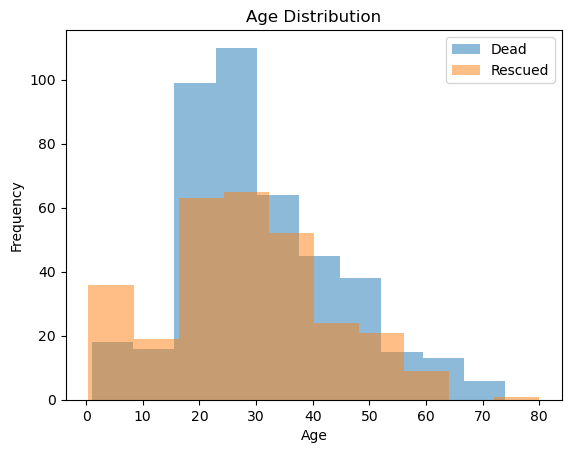

In [ ]:
data.Age[data.Survived == 0].plot(kind='hist', alpha=0.5)
data.Age[data.Survived == 1].plot(kind='hist', alpha=0.5)
 # plots an axis lable
plt.xlabel("Age")
plt.title("Age Distribution")
# sets our legend for our graph.
plt.legend(('Dead', 'Rescued'));

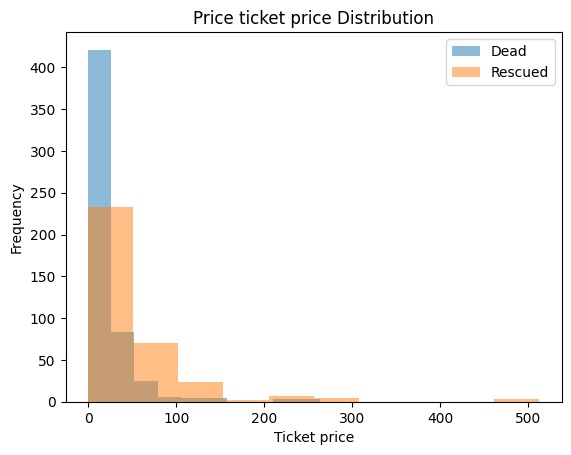

In [ ]:
data.Fare[data.Survived == 0].plot(kind='hist', alpha=0.5)
data.Fare[data.Survived == 1].plot(kind='hist', alpha=0.5)
 # plots an axis lable
plt.xlabel("Ticket price")
plt.title("Price ticket price Distribution")
# sets our legend for our graph.
plt.legend(('Dead', 'Rescued'))

**8. How does the average age of men / women differ depending on the class of service? Choose the correct statements:**
- On average, 1st class men are over 40 years old
- On average, 1st class women are over 40 years old
- Men of all classes are on average older than women of the same class
- On average, people in the 1st grade are older than people in the 2nd grade, and people in the 2nd grade are older than people in the 3rd grade.

In [ ]:
data.groupby(['Pclass','Sex'])['Age'].mean()
print("On average, 1st class men are over 40 years old")
print("Men of all classes are on average older than women of the same class")
print("On average, people in the 1st grade are older than people in the 2nd grade, and people in the 2nd grade are older than people in the 3rd grade.")

On average, 1st class men are over 40 years old
Men of all classes are on average older than women of the same class
On average, people in the 1st grade are older than people in the 2nd grade, and people in the 2nd grade are older than people in the 3rd grade.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the training sample.**

In [ ]:
train_df = pd.read_csv("https://github.com/ipython-books/cookbook-2nd-data/blob/master/titanic_train.csv?raw=true",
                       index_col='PassengerId')

In [ ]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Remove the Cabin column, and then - all the lines where there are NA.**

In [ ]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [ ]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


**Show pairwise dependencies of the features Age, Fare, Pclass, Sex, SibSp, Parch, Embarked and Survived. (method scatter_matrix Pandas or pairplot Seaborn).**

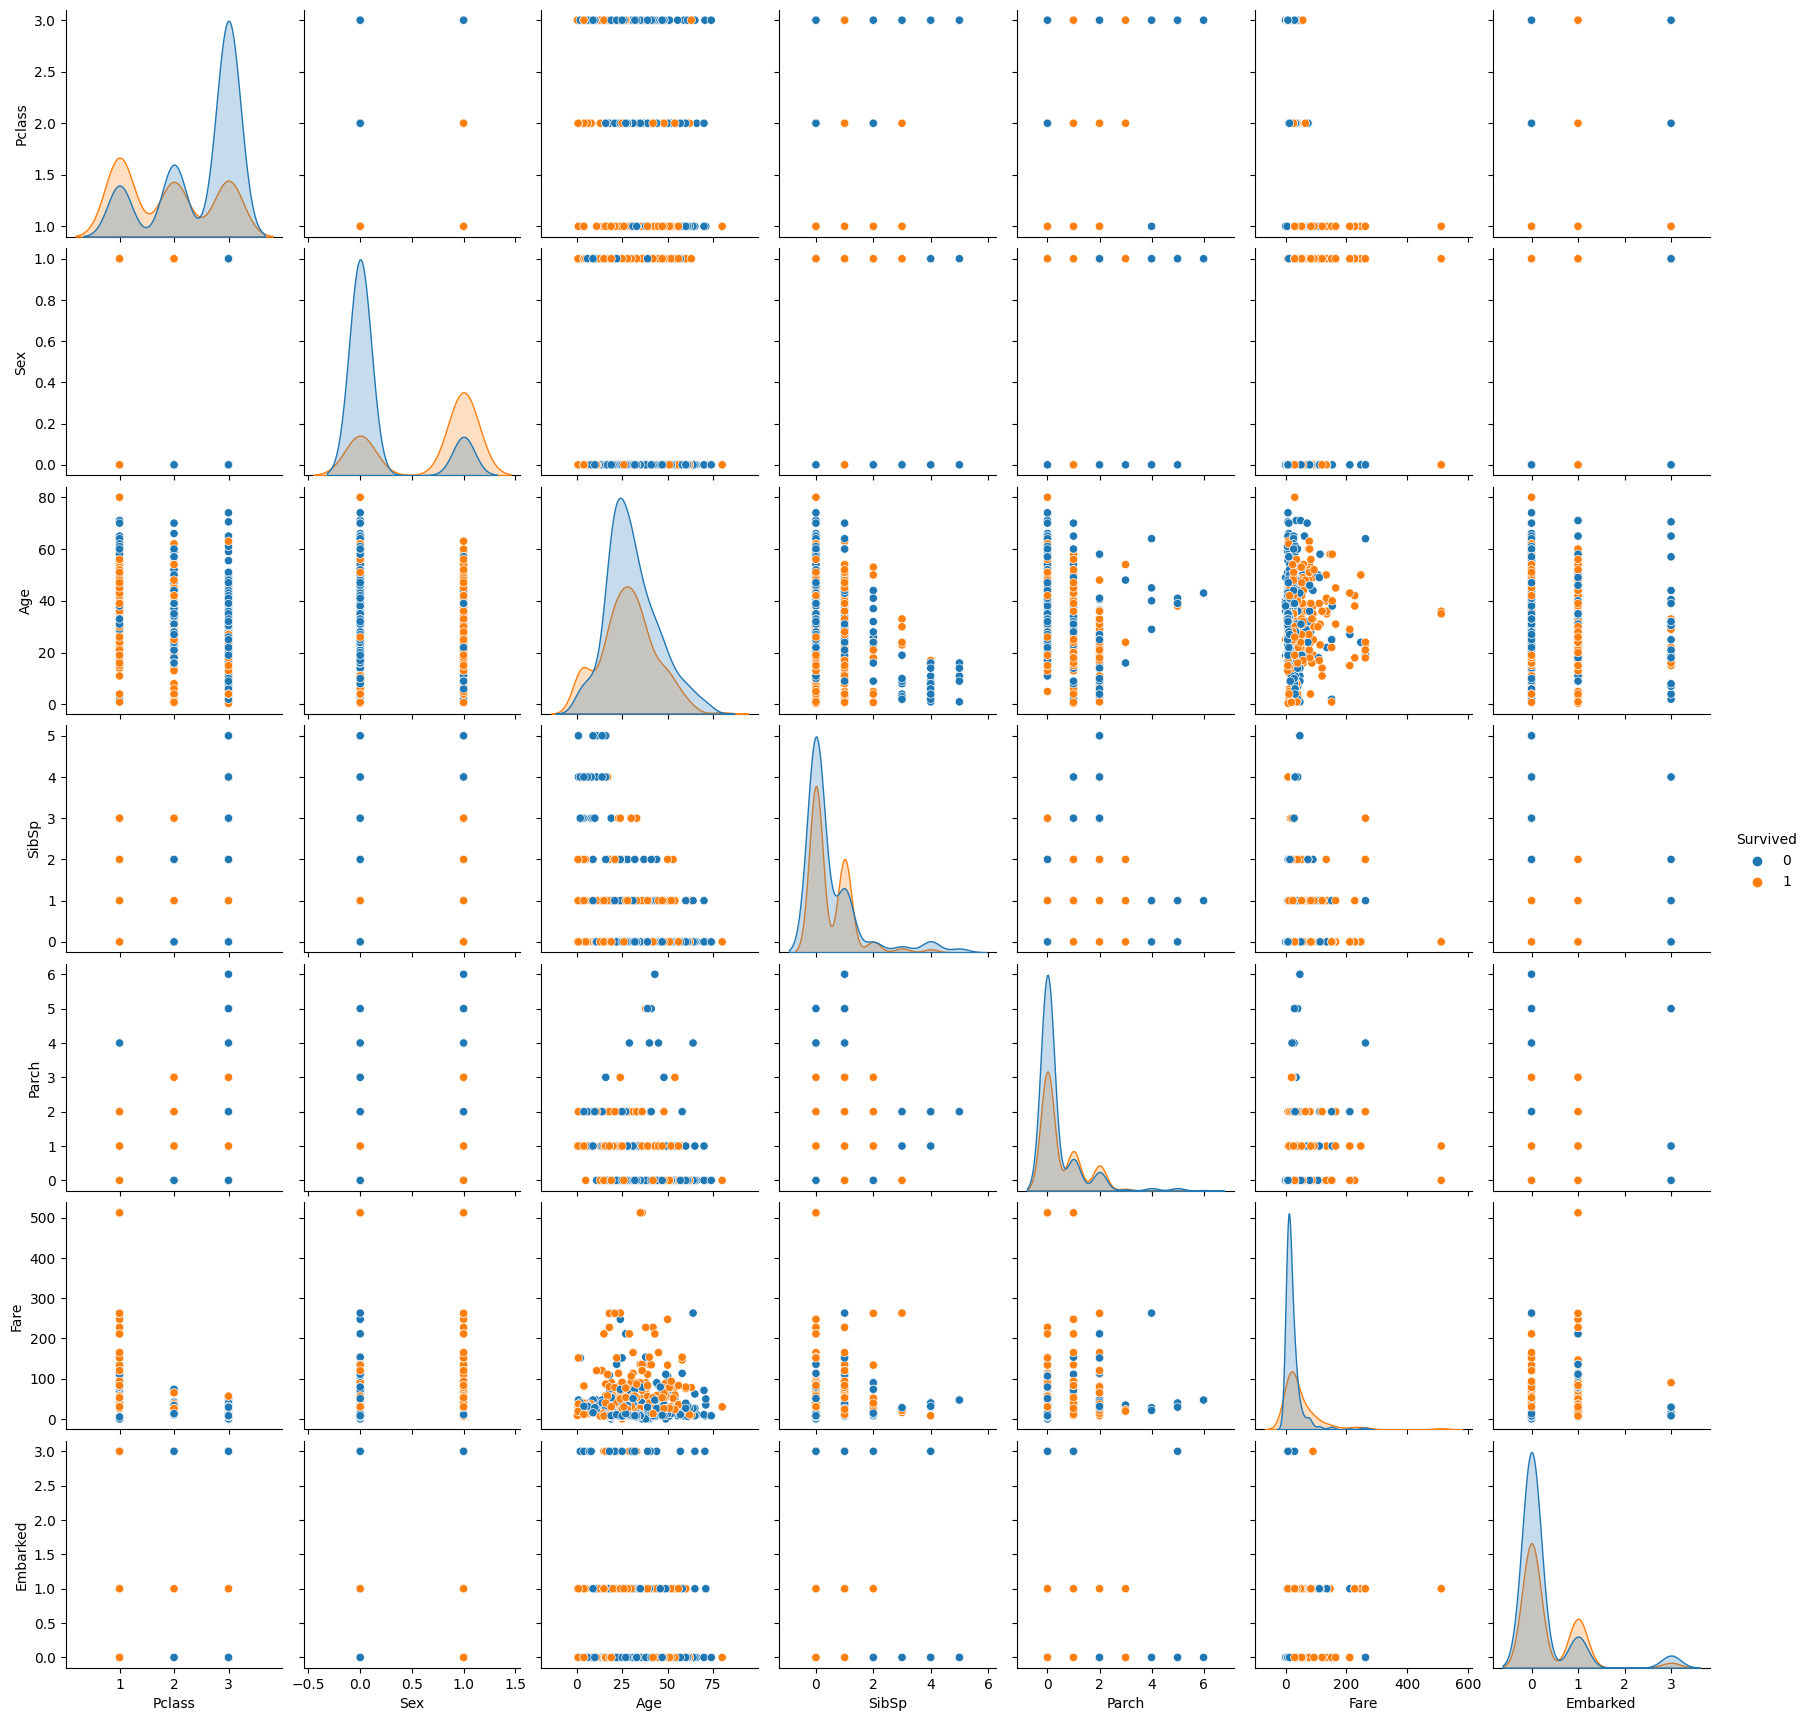

In [ ]:
train_df['Sex'].replace({'male':0, 'female':1}, inplace=True)
train_df['Embarked'].replace({'S':0, 'C':1, 'Q':3}, inplace=True)
sns.pairplot(train_df,hue='Survived')

**How does the ticket price (Fare) depend on the cabin class (Pclass)? Plot boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare'>

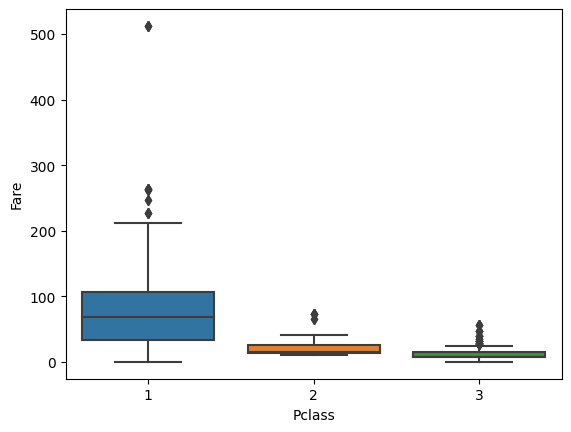

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)

**What is the ratio of dead to survivors by gender? Render with Seaborn.countplot with hue.**

<Axes: xlabel='Survived', ylabel='count'>

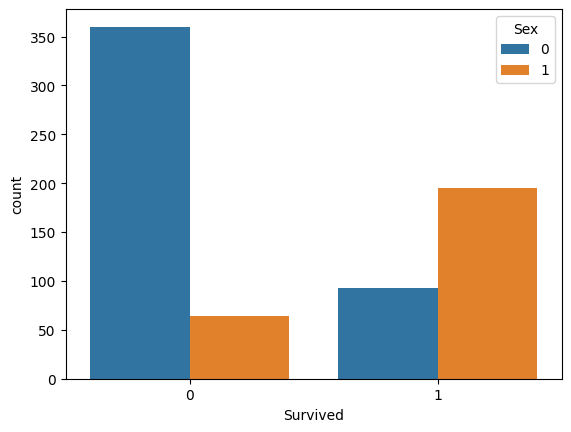

In [ ]:
sns.countplot(x ='Survived', hue='Sex',data = train_df)

**What is the ratio of dead to survivors depending on the class of the cabin? Render with Seaborn.countplot with hue.**

<Axes: xlabel='Survived', ylabel='count'>

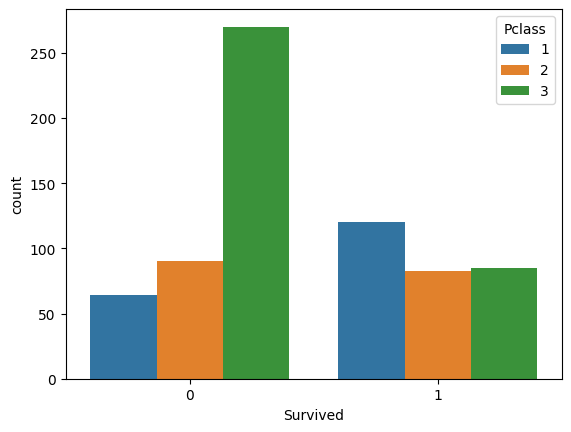

In [ ]:
sns.countplot(x ='Survived', hue='Pclass',data = train_df)

**How does the fact of survival depend on the age of the passenger? Check (graphically) the assumption that the young survived more often. Let, conditionally, the young - under 30 years old, the elderly - over 60 years old.**

In [ ]:
def age_category(age):
    if age < 30:
        return 'young'
    elif age > 60:
        return 'elderly'
    else:
        return 'middle-aged'

In [ ]:
age_categories = [age_category(age) for age in train_df.Age]

In [ ]:
train_df['Age_category'] = age_categories

<Axes: xlabel='Age_category', ylabel='count'>

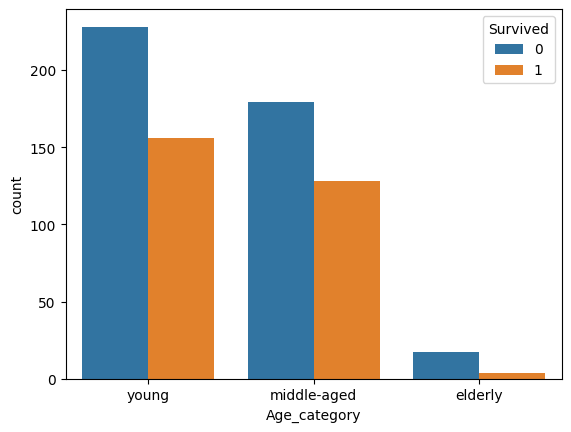

In [ ]:
sns.countplot(x ='Age_category', hue='Survived',data = train_df)


In [ ]:
print("The young didn't survive more often")
print("the fact of survival doesn't depend on the age of the passenger")

The young didn't survive more often
the fact of survival doesn't depend on the age of the passenger
